## Import required library

In [1]:
import os                                     # interact with the operating system
import shutil                                 # operating on file like copying, create and del directories and file
from PIL import Image                         # image processing 
from multiprocessing.pool import ThreadPool   # parallelizing the process
from tqdm import tqdm                         # for progess bar
import glob                                   # for searcing the file with specific file pattern or name

In [2]:
import torch
import numpy as np
import pandas as pd
import torchvision
from torchvision import datasets
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [28]:
"""processed_root = "data"

os.makedirs(processed_root, exist_ok=True)
for class_dir in os.listdir(original_root):
    class_path = os.path.join(original_root, class_dir)
    if os.path.isdir(class_path):
        frames_path = os.path.join(class_path, "frames_sampled30")
        if os.path.exists(frames_path):
            processed_class_path = os.path.join(processed_root, class_dir)
            os.makedirs(processed_class_path, exist_ok=True)
            # move all the images to the processed_class_path
            for img_file in os.listdir(frames_path):
                src = os.path.join(frames_path, img_file)
                dest = os.path.join(processed_class_path, img_file)
                shutil.copy(src, dest)

print(f"Data preprocessing Completed")  """

'processed_root = "data"\n\nos.makedirs(processed_root, exist_ok=True)\nfor class_dir in os.listdir(original_root):\n    class_path = os.path.join(original_root, class_dir)\n    if os.path.isdir(class_path):\n        frames_path = os.path.join(class_path, "frames_sampled30")\n        if os.path.exists(frames_path):\n            processed_class_path = os.path.join(processed_root, class_dir)\n            os.makedirs(processed_class_path, exist_ok=True)\n            # move all the images to the processed_class_path\n            for img_file in os.listdir(frames_path):\n                src = os.path.join(frames_path, img_file)\n                dest = os.path.join(processed_class_path, img_file)\n                shutil.copy(src, dest)\n\nprint(f"Data preprocessing Completed")  '

In [7]:
# calculating the total number of directory and images in each directory
processed_root="/home/ritushwar/Nutritional-Assistance/data"
total_img = 0
imgs_per_dir = []  # for making the list of images in each directory
total_dirs = 0     # for calculating total no of directories
for dir in os.listdir(processed_root): 
    processed_class_path = os.path.join(processed_root, dir)
    if os.path.isdir(processed_class_path):
        total_dirs +=1
        img = 0            # for calculating total no of images in each directory
        for im in os.listdir(processed_class_path):
            img_path = os.path.join(processed_class_path, im)
            if os.path.isfile(img_path):
                img += 1
                total_img +=1
        imgs_per_dir.append(img)
        if img == 29:
            print(processed_class_path)
        img = 0

print("Done")

Done


In [8]:
indx = imgs_per_dir.index(28, 0, -1)
print(indx)

121


In [9]:
# finding the unique number of images
unq_img = set(imgs_per_dir)

In [10]:
print(f"Total no of directory: {total_dirs}")
print(f"Total no of images: {total_img}")
print(f"Unique set of images per directory: {unq_img}")

Total no of directory: 4571
Total no of images: 49647
Unique set of images per directory: {2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28}


## Resize the image

In [11]:
# using pillow library
img_path = "/home/ritushwar/Nutritional-Assistance/camera_A_frame_003.jpeg"
image = Image.open(img_path)
print(image.size)
image.show()

(1920, 1080)


In [85]:
# using resize method
new_image = image.resize((200,200))
new_image.show()

In [ ]:
# using thumbnail method
image.thumbnail((320,320))
image.show()

In [12]:
for dir in os.listdir(processed_root):
    processed_class_path = os.path.join(processed_root, dir)
    if os.path.isdir(processed_class_path):
        for img in os.listdir(processed_class_path):
            image_path = os.path.join(processed_class_path, img)
            if os.path.isfile(image_path):
                org_image = Image.open(image_path)
                org_image.thumbnail((320, 180))
                org_image.save(image_path)

print("All image are resized")

All image are resized


## Rotate the image 180

In [42]:
for dir in os.listdir(processed_root):
    processed_class_path = os.path.join(processed_root, dir)
    if os.path.isdir(processed_class_path):
        for img in os.listdir(processed_class_path):
            image_path = os.path.join(processed_class_path, img)
            if os.path.isfile(image_path):
                org_image = Image.open(image_path)
                rotate_image = org_image.rotate(180, expand=True)
                rotate_image.save(image_path)

print("All image are rotated")

All image are rotated


In [43]:
#converting into tensor for iteration
data_path = processed_root
data_tensor = datasets.ImageFolder(
    root=data_path,
    transform=transforms.ToTensor(),
    target_transform=None
)

In [44]:
image, label = data_tensor[0]
print(image.shape)
print(label)

torch.Size([3, 180, 320])
0


## Split into train and test

In [45]:
torch.manual_seed(42)
train_size = int(0.8*len(data_tensor))
test_size = len(data_tensor) - train_size
print(train_size, test_size)
training_data, testing_data = random_split(data_tensor, [train_size, test_size])

39717 9930


In [46]:
print(training_data[0])

(tensor([[[0.3137, 0.3255, 0.3333,  ..., 0.0039, 0.0000, 0.0000],
         [0.3255, 0.3333, 0.3373,  ..., 0.0039, 0.0000, 0.0000],
         [0.3333, 0.3373, 0.3373,  ..., 0.0039, 0.0000, 0.0000],
         ...,
         [0.4863, 0.4824, 0.4745,  ..., 0.3412, 0.3412, 0.3294],
         [0.4863, 0.4863, 0.4784,  ..., 0.3255, 0.3255, 0.3137],
         [0.4902, 0.4863, 0.4784,  ..., 0.3216, 0.3176, 0.3059]],

        [[0.3333, 0.3490, 0.3569,  ..., 0.0196, 0.0157, 0.0118],
         [0.3451, 0.3569, 0.3608,  ..., 0.0196, 0.0157, 0.0157],
         [0.3529, 0.3608, 0.3608,  ..., 0.0275, 0.0235, 0.0235],
         ...,
         [0.4471, 0.4431, 0.4431,  ..., 0.3569, 0.3569, 0.3451],
         [0.4471, 0.4471, 0.4471,  ..., 0.3412, 0.3412, 0.3294],
         [0.4510, 0.4471, 0.4471,  ..., 0.3373, 0.3333, 0.3216]],

        [[0.1059, 0.1137, 0.1216,  ..., 0.0235, 0.0196, 0.0157],
         [0.1176, 0.1216, 0.1255,  ..., 0.0157, 0.0196, 0.0118],
         [0.1255, 0.1255, 0.1255,  ..., 0.0118, 0.0157, 0

## Creating batches of image of batch size 30

In [51]:
batch_size = 32
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(testing_data, batch_size=batch_size, shuffle=True)

## Visualization

In [47]:
print(len(training_data), len(testing_data))
print(type(training_data))
print(type(training_data[0]))

39717 9930
<class 'torch.utils.data.dataset.Subset'>
<class 'tuple'>


In [48]:
classes = data_tensor.classes

In [49]:
image_tensor, label = training_data[2000]
print(label)
print(classes[label])
print(image.shape)
print(image_tensor)

428
dish_1551123904
torch.Size([3, 180, 320])
tensor([[[0.3451, 0.3569, 0.3569,  ..., 0.0000, 0.0000, 0.0000],
         [0.2588, 0.3176, 0.3882,  ..., 0.0000, 0.0000, 0.0000],
         [0.1804, 0.3176, 0.4941,  ..., 0.0039, 0.0000, 0.0039],
         ...,
         [0.3059, 0.3020, 0.2980,  ..., 0.6863, 0.6902, 0.6941],
         [0.3098, 0.3059, 0.2980,  ..., 0.6392, 0.5843, 0.5373],
         [0.3137, 0.3098, 0.3020,  ..., 0.5725, 0.4275, 0.3176]],

        [[0.3608, 0.3961, 0.4275,  ..., 0.0431, 0.0549, 0.0667],
         [0.2667, 0.3490, 0.4627,  ..., 0.0431, 0.0392, 0.0353],
         [0.1843, 0.3412, 0.5529,  ..., 0.0980, 0.0863, 0.0824],
         ...,
         [0.3020, 0.2980, 0.2941,  ..., 0.6235, 0.6275, 0.6314],
         [0.3059, 0.3020, 0.2941,  ..., 0.5765, 0.5216, 0.4745],
         [0.3098, 0.3059, 0.2980,  ..., 0.5098, 0.3647, 0.2549]],

        [[0.3569, 0.4000, 0.4667,  ..., 0.0706, 0.0824, 0.0824],
         [0.2549, 0.3569, 0.4902,  ..., 0.0784, 0.0667, 0.0588],
         [0.

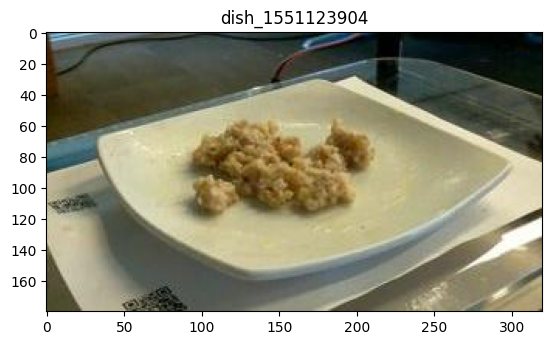

In [50]:
# convert the image tensor into numpy
image_np = image_tensor.numpy()
image_np = np.transpose(image_np, (1,2,0))

#plot the image
plt.imshow(image_np.squeeze())
plt.title(classes[label])
plt.show()

In [25]:
df = pd.read_csv("/home/ritushwar/Nutritional-Assistance/metadata/dish_meta_data.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4571 non-null   object 
 1   total_calories  4571 non-null   float64
 2   total_mass      4571 non-null   float64
 3   total_fat       4571 non-null   float64
 4   total_carb      4571 non-null   float64
 5   total_protein   4571 non-null   float64
 6   label           4571 non-null   object 
dtypes: float64(5), object(2)
memory usage: 250.1+ KB
None


,id,total_calories,total_mass,total_fat,total_carb,total_protein,label
0,dish_1561662216,300.794281,193.0,12.387489,28.218290,18.633970,"[np.str_('mixed greens'), np.str_('brown rice'..."
1,dish_1562688426,137.569992,88.0,8.256000,5.190000,10.297000,"[np.str_('chicken apple sausage'), np.str_('ro..."
2,dish_1561662054,419.438782,292.0,23.838249,26.351543,25.910593,"[np.str_('mixed greens'), np.str_('pork'), np...."
3,dish_1562008979,382.936646,290.0,22.224644,10.173570,35.345387,"[np.str_('wheat berry'), np.str_('caesar salad..."
4,dish_1560455030,20.590000,103.0,0.148000,4.625000,0.956000,"[np.str_('cherry tomatoes'), np.str_('cucumber..."


In [23]:
def get_data_from_id(dish_id):
    row_data = df.loc[df['id']== dish_id]
    row_dict = row_data.to_dict(orient='records')[0]
    cleaned_text = []
    for part in row_dict['label'].split("np.str_("):
        if "'" in part:
            text = part.split("'")[1]
            cleaned_text.append(text)

    row_dict['label'] = cleaned_text
    return row_dict

In [40]:
dish_id = classes[label]
row_dict = get_data_from_id(dish_id)
print(row_dict)

{'id': 'dish_1551123904', 'total_calories': 44.200001, 'total_mass': 65.0, 'total_fat': 0.91, 'total_carb': 7.8, 'total_protein': 1.56, 'label': ['oatmeal']}
